In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')


In [7]:
train_original = train.copy()
test_original = test.copy()

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [15]:
train.shape

(614, 13)

In [16]:
test.shape

(367, 12)

## Target Variable
We will first look at the target variable, i.e., Loan Status.

In [17]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

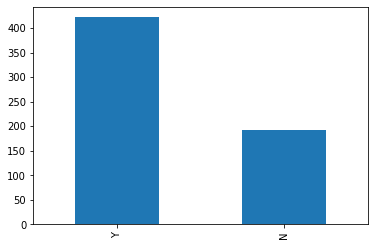

In [19]:
train['Loan_Status'].value_counts().plot.bar()

##### The loan of 422(around 69%) people out of 614 approved.

Now lets visualize each variable separately. Different types of variable are categorical, ordinal and numerical.

* Categorical Features: These have categories(Gender, Married, Self-empployed, Credit_history, Loan_status)
* Ordinal features: have numerical values()
* Numerical features ()

## Independent Variable (Categorical)

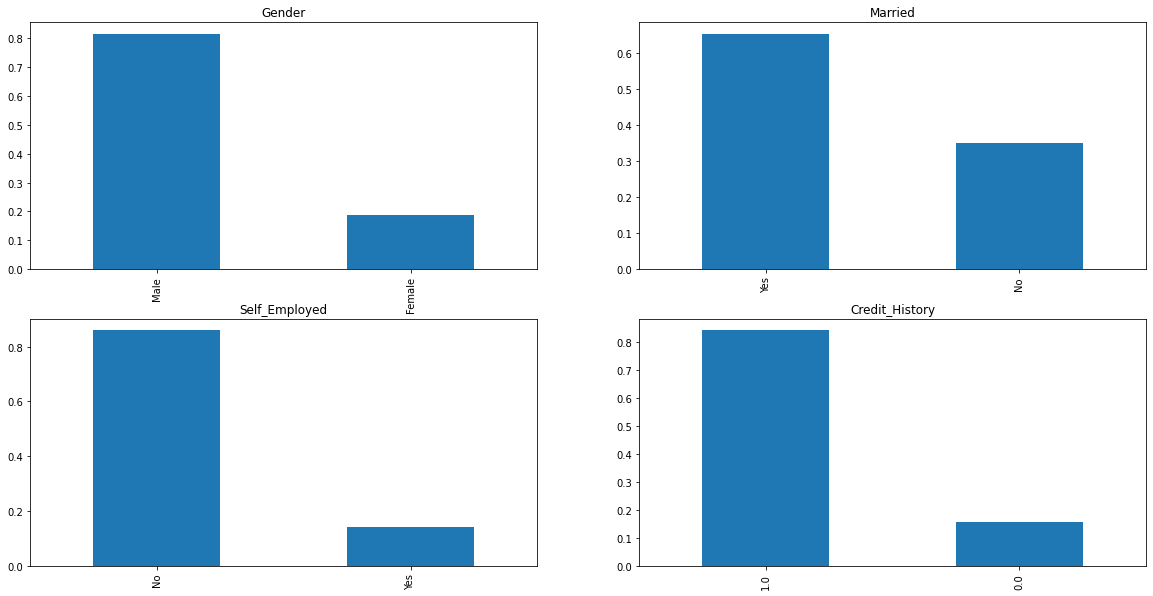

In [21]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(
    figsize=(20, 10), title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(
    figsize=(20, 10), title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(
    figsize=(20, 10), title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:
* 80% applicants are male
* Around 65% are married
* 85% have repaid their debts

Now let's visualize the ordinal variables.

### Independent Variable (Ordinal)

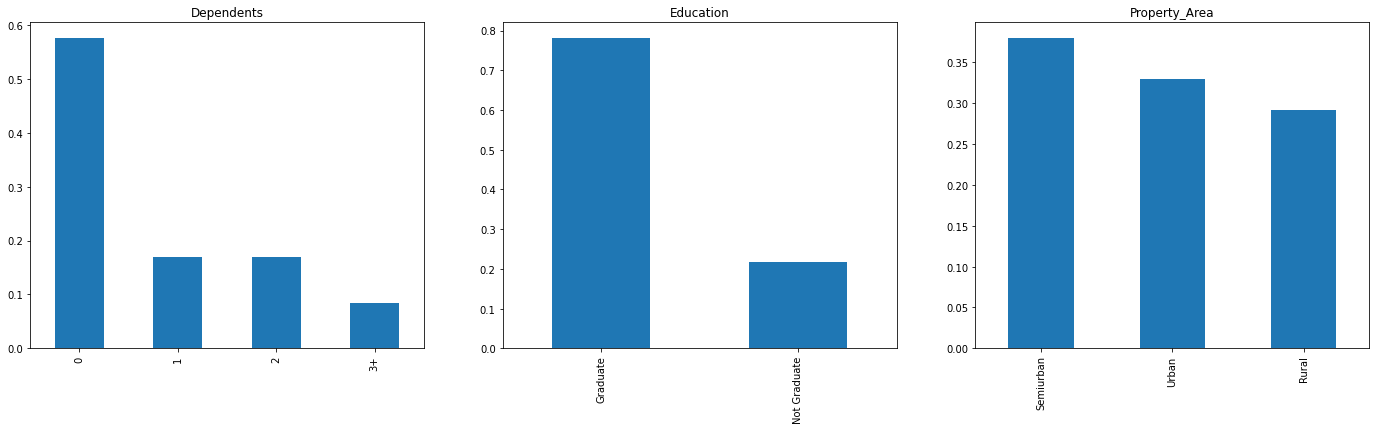

In [23]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(
    figsize=(24, 6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(
    figsize=(24, 6), title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(
    figsize=(24, 6), title='Property_Area')

plt.show()


* Most of the applicants don't have any dependents.
* Around 80% of the applicants are graduate.
* Most of the applicants are from Semiurban area

Independent Variable (Numerical)

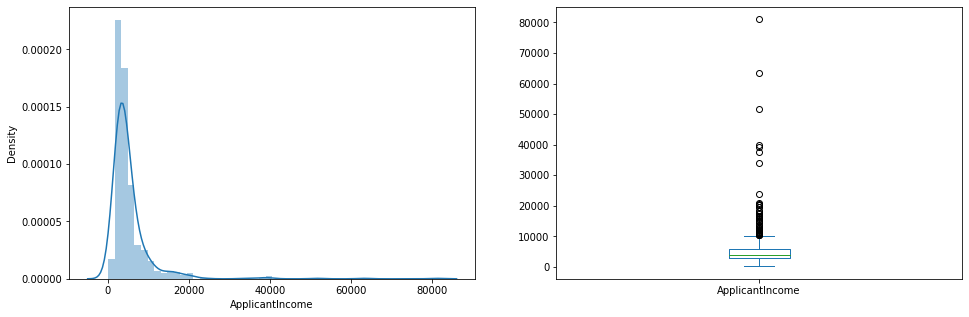

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

It can be inferred that most of the data is towards left. This is not nomally distribuited. The boxplot confirms the presence of outliers. This can be attribuited to the income disparity in the society. Part of this can be by Education.

Text(0.5, 0.98, '')

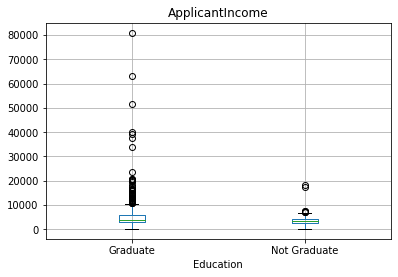

In [33]:
train.boxplot(column= 'ApplicantIncome', by = 'Education')
plt.suptitle("")



We can see that there are a higher numbers of graduates with very high incomes, which are appearing to be the outliers.

Let's look at the Coapplicant income distribuition

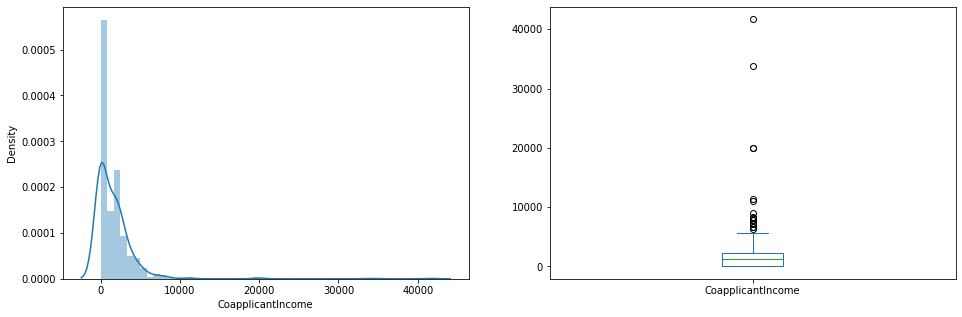

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16, 5))
plt.show()


We see a similar distribuition as that of the applicant income.

Let's look at the distribuition of LoanAmount variable

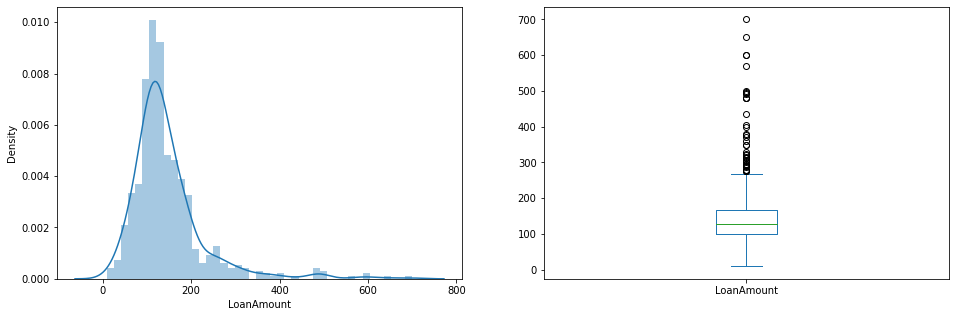

In [37]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16, 5))
plt.show()


We see a lot of outliers too.

Some hypotheses:
* Applicants with high income have more chances of loan approval
* who have repaid previous debt shoul have higher chances of loan approval
* Loan approval depend on the loan amount. Loan is less, chances approval be high.
* Lesser the amoun to be paid monthly to repay the loan, higher the chances of loan approval.

We try to test the above mentioned using bivariate analysis.

### Categorical Independent Variable vs Target Variable

we will find the relation between target variable and categorical independent variable.

<AxesSubplot:xlabel='Gender'>

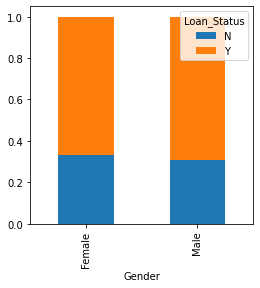

In [42]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind = "bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of both sex is more or less same for both

<AxesSubplot:xlabel='Self_Employed'>

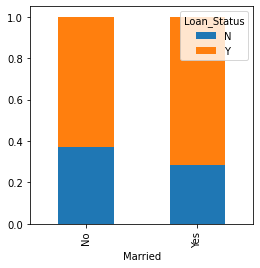

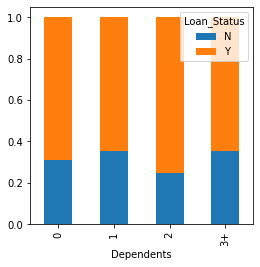

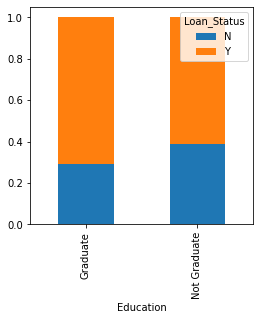

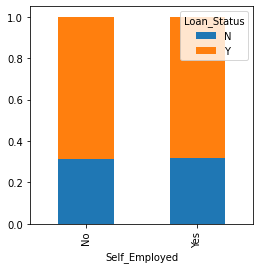

In [56]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind = "bar", stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind = "bar", stacked=True, figsize=(4,4))

* Proportion of married applicants is higher for the approved loans
* Applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* There is nothing we can infer from Self_Employed.

Now we look at the relationship between remaining categorical independent variables and Loan_Status.

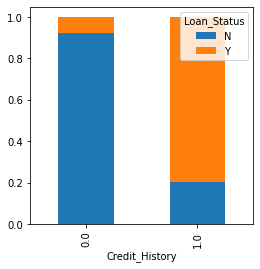

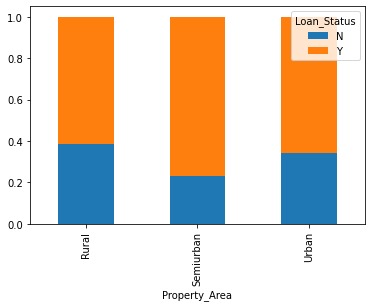

In [57]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind = "bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
plt.show()

* Peole with credit history as 1 are more likley to get their loans approved.
* Proportion of loans gettings approved in semiurban area is higher.

Now let's visualize numerical independents variables with respect to target variable.

### Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

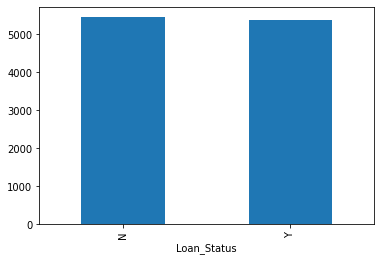

In [59]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the status for each bin

In [ ]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),
                  axis=0).plot(kind="bar", stacked=True)
plt.show()


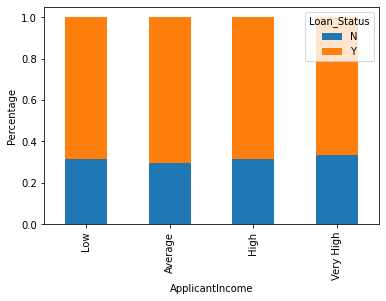

In [83]:
bins = [0,2500,4000,6000,81000 ] 
group= ['Low', 'Average', 'High', 'Very High']
train['Incomebin'] = pd.cut(train['ApplicantIncome'],bins, labels=group)

Incomebin= pd.crosstab(train['Incomebin'],train['Loan_Status'])
Incomebin.div(Incomebin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


It can be inferred that Applicant income does not affect the chances of loan approval, this contradicts our hypothesis in which assumed that if the applicant income is high, the chances of loan approval will also be high

we will analyze the coapplicant income and loan amount variable in similar manner

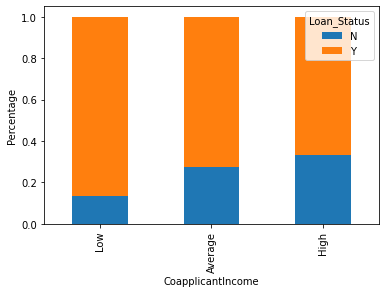

In [84]:
bins = [0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels= group)

Coaplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coaplicant_Income_bin.div(Coaplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant's income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have coapplicant so the income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable = combine the applicant's and coappplicant's income.

let us combine the Applicant Income and Coadpplicant Income and see the combined effect of Total Income on the Loan_Status.

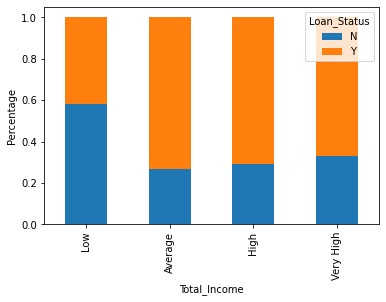

In [88]:
train['Total_Income'] = train['ApplicantIncome']+ train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_bin'] = pd.cut(
    train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


we can see that proportion of loans getting approved for applicants having low Total_income is very less as compared to that of applicants with Average, high and very high income.

Let's visualize the Loan amount variable.

In [98]:
train['LoanAmount'].min()


9.0

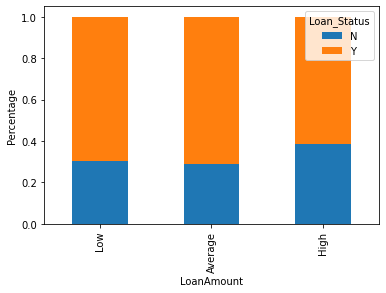

In [89]:
bins= [0, 100, 200, 700]
group = ['Low','Average','High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'],bins,labels=group)

LoadAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoadAmount_bin.div(LoadAmount_bin.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')



It can be seen that the proportion of approved is higher for Low and Average loan Amount as comparecd to that of High Loan Amount which support our hypothesis in which we considered that the chances of loan approval will be high when the loan amoun is less.

Let's drop the bins which we created for the part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable's categories into 0 and 1 so that we can find its correlaation with numerical variables. One more reason to do so is few  models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1

In [106]:
train = train.drop(['Incomebin', 'Coapplicant_Income_bin',
                   'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color meeans their correlation is more.

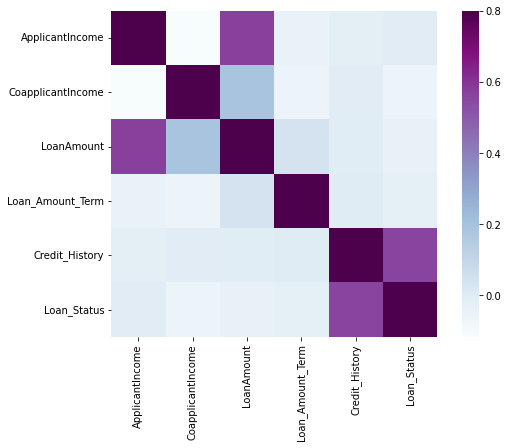

In [107]:
matrix = train.corr() 
f, ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax= .8, square=True, cmap="BuPu");

we can see that most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing Value and Outlier Treatmen


we can now impute the missing values and treat the outliers becaise missing data and outliers can have adverse effect on the model performance.

### Missing value imputation
Let's list out feature-wise count of missing values.

In [108]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are missing values in Gender, Married, Dependents, Self-employed, Loan_Amount_Term and Credits_History features.

We will treat thee missing Values in all the geatures one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode.

there are very less missing values in Gender, Married, Dependents, Credit_History and Self_employed features so we can fill them using the mode of the features.

In [118]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace= True)
train['Married'].fillna(train['Married'].mode()[0],inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let's try to find a way to fill the missing values in Loan Amount Term. We will look at the value count of the Loan amount term variable

In [120]:
train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [122]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [123]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)


now lets check whether all the missing values are filled in the dataset

In [124]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let's fill all the missing values in the dataset too with the same approach.

In [139]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)


### Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers.

Plotting LoanAmount.

<AxesSubplot:>

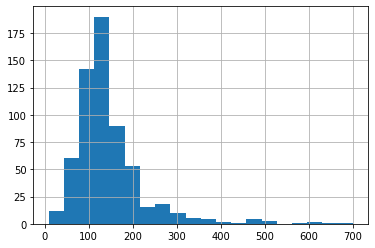

In [126]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. Right skewness. We'll log transformation.

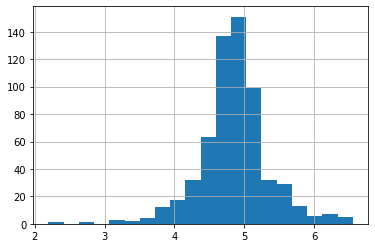

In [142]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution look much closer to normal and effect of extrem values has been significantly subsided. Let's build a logistic regresion model.

### Model Building

Let's drop the Loan_ID variable as it do not have any effect on the loan status.

In [128]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis= 1)

We will use scikit-learn (sklearn) for making different moddels.

In [129]:
X= train.drop('Loan_Status',1)
y = train.Loan_Status

Creating dummies varibles:
* 'Gender' variable (two classes, Male (0) and Female(1)).

In [143]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

We will train the model on training dataset. We will divide our train dataset into two parts: train and validation.

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

Let us import LogisticRegression and accuracy_score from sklearn and fit.

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [133]:
LogisticRegression(C=1.0, class_weight= None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='12', random_state=1, solver='liblinear', tol= 0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [134]:
pred_cv = model.predict(x_cv)

let us calculate how accurate our predictions are by calculating the accuracy.

In [135]:
accuracy_score(y_cv, pred_cv)

0.8

So our predictions are almost 80% accurate. 80% of the loan have status correctly.
Let's make predictions for the test dataset.

In [144]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker

In [148]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

we only need the Loan_ID and the corresponding Loan_Status for the final submission. We will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [149]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']


remember we need predictions in Y and N. So Let's convert 1 and 0 to Y and N.

In [150]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

Finally we will convert the submission to csv. format and make submission to check the accuracy on the leaderboard.

In [151]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

From this submission we got an accuracy of 0.8 on the leaderboard

We will use Stratified k-folds for validate our model

In [152]:
from sklearn.model_selection import StratifiedKFold

In [155]:
i= 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)

    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve

In [157]:
from sklearn import metrics 


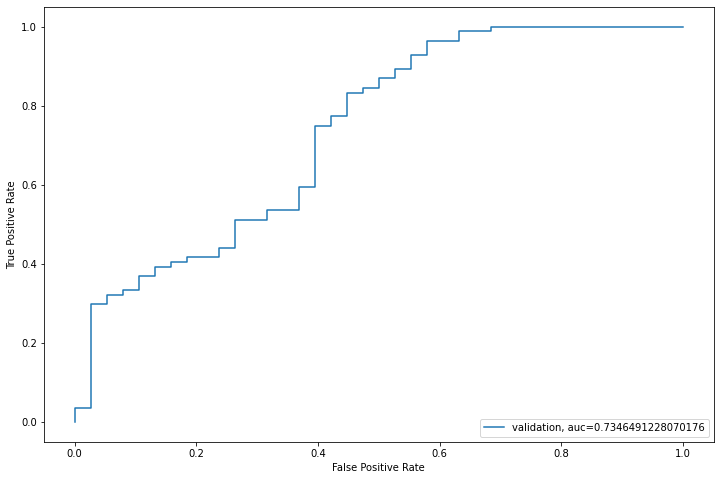

In [159]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label = "validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


we got an auc value of 0.73

In [160]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

We need predictions in Y and N. So let's convert 1 and 0 to Y and N

In [161]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


Lets convert the submition to csv format and make submission to check the accuracy on the leaderboard

In [162]:
pd.DataFrame(submission, columns= ['Loan_ID','Loan_Status']).to_csv('logistic.csv')

we got an accuracy of 0.73. Now we will try to improve this accuracy using differents approaches

### Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. 
* Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* EMI-EMI is the monthly amount to be paid by the applicant to repay the loan.
Idea behind making this variable is that people who have high EMl's might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [163]:
train['Total_Income']= train['ApplicantIncome']+ train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

distribution of Total Income

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

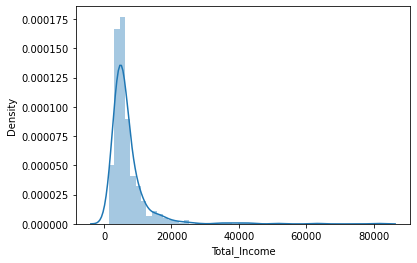

In [164]:
sns.distplot(train['Total_Income'])

Shifted toward left. The distribution is right skewed. apply log transformation to make the distribution normal

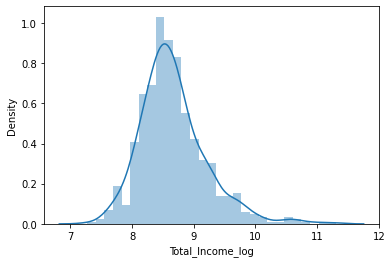

In [165]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's create the EMI feature now

In [166]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']


<AxesSubplot:xlabel='EMI', ylabel='Density'>

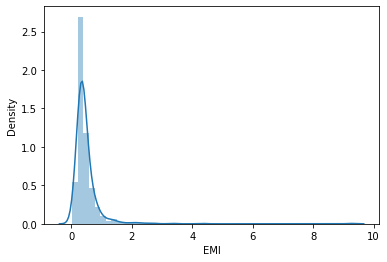

In [167]:
sns.distplot(train['EMI'])

Let's create Balance Income feature now and check its distribuition

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

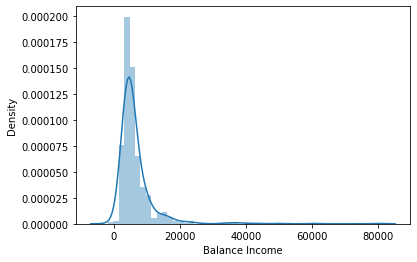

In [168]:
train['Balance Income']= train['Total_Income']-(train['EMI']*1000) # *1000 to make the units equal test
test['Balance Income']= test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income'])

Let us now drop the variables which we used to create these new features, because the correlation between those old feature and thses new features will be very high and logistic regression assumes that the variable are not highly corretaled. We also wants to remove the noise from the dataset, so removing correlated feature will help in reducing the noise too.

In [169]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'],axis=1)

We will buil the following models:
* Logistic Regresio
* Decision Tree
* Random Fores 
* XGBoost

Lets prepare data for feeding into the models

In [170]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status   #Save target variable in separate dataset


#### Logistic Regression

In [171]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)

    i +=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]   


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


the mean validation accuracy is 0.721

In [172]:
submission['Loan_Status'] = pred_test   #filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']    #filling Loan_ID with test Loan_ID

#replacing 0 and 1 whit N and Y
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

### Decision Tree

In [173]:
from sklearn import tree

In [174]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)

    i +=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


The mean Validation accuracy for this model is 0.69

In [175]:
submission['Loan_Status'] = pred_test   #filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']    #filling Loan_ID with test Loan_ID

#replacing 0 and 1 whit N and Y
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision tree.csv')

### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)

    i += 1
    pred_test = model.predict(test)



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


The mean validation accuracy for this model is 0.794

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [181]:
from sklearn.model_selection import GridSearchCV

In [179]:
# Provide range for max_depth from 1 to 20 with an interval of 2 from 1 to 2000 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1,20, 2)), 'n_estimators': list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1),paramgrid)

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3, random_state=1)

#Fit the grid search model;
grid_search.fit(x_train, y_train)

GridSearchCV(cv = None, error_score = 'raise', 
estimator = RandomForestClassifier(bootstrap= True,
class_weight=None, criterion='gini', max_depth=None,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
oob_score= False, random_state=1, verbose=0, warm_start=False), n_jobs =1, param_grid={'max_depth':[1,3,5,7,8,11,13,15,17,19],
'n_estimators':[1,21,41,61,81,101,121,141,161,181]},

pre_dispatch= '2*n_jobs',refit=True,
return_train_score='warn',
scoring=None, verbose=0)


GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 8, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [193]:

#Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap = True, class_weight=None, criterion='gini', 
max_depth= 3, max_features='auto', max_leaf_nodes=None, 
min_impurity_decrease=0.0,
min_samples_leaf=1 ,min_samples_split=2, 
min_weight_fraction_leaf=0.0,
n_estimators=41, n_jobs=1, oob_score=False, random_state=1, 
verbose=0,warm_start=False)

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=41,
                       n_jobs=1, random_state=1)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let's build the model using these optimized values

In [195]:
from sklearn.model_selection import StratifiedKFold


In [198]:
i=1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1

    pred_test = model.predict(test)
    pred2 =model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7786885245901639


The mean validation accuracy for this model is 0.81

In [199]:
submission['Loan_Status'] = pred_test   #filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']    #filling Loan_ID with test Loan_ID

#replacing 0 and 1 whit N and Y
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

Let us find the feature importance now, i.e. features are most important for this problem. we will use features_importaces_attribute of sklearn to do so.

<AxesSubplot:>

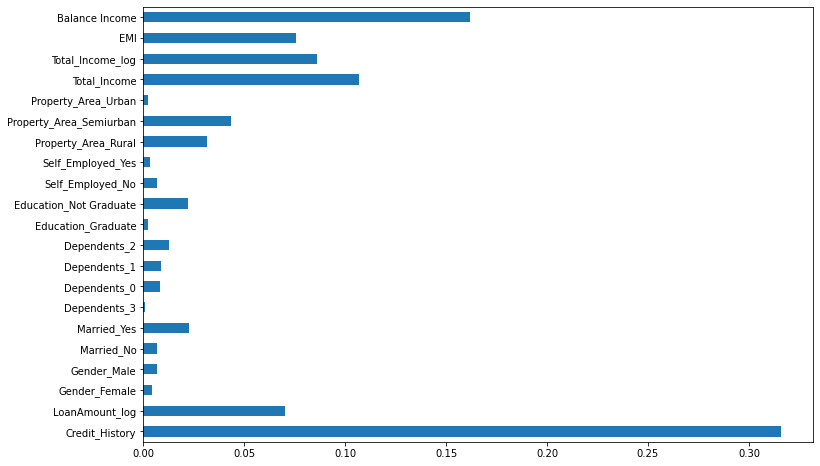

In [200]:
importances = pd.Series(model.feature_importances_,index= X.columns)
importances.plot(kind = 'barh', figsize=(12,8))

we can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable

### XGBOOST

In [201]:
from xgboost import XGBClassifier

In [205]:
i= 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    model= XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)

    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    it=1

    pred_test = model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7804878048780488

1 of kfold 5
accuracy_score 0.7886178861788617

1 of kfold 5
accuracy_score 0.7642276422764228

1 of kfold 5
accuracy_score 0.7804878048780488

1 of kfold 5
accuracy_score 0.7622950819672131


The mean validation accuracy for this model is 0.78

In [206]:
submission['Loan_Status'] = pred_test   #filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']    #filling Loan_ID with test Loan_ID

#replacing 0 and 1 whit N and Y
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

after trying and testing 4 different algorithms, the best accuracy is achieved by RandomForest